In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import FreqDist
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams
import re
from collections import Counter
from nltk.lm import MLE
from nltk.lm import Laplace

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samarthpawar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/samarthpawar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samarthpawar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Globals

In [15]:
text_corpus = ""
is_lemmatization = True
is_stemming = False

## Helpful functions

In [16]:
def get_small_case(text):
  return ' '.join(re.findall(r'\w+', text.lower()))


token_counts = Counter(get_small_case(text_corpus))


def P(word, N=sum(token_counts.values())):
  """Probability of word"""
  return token_counts[word] / N

def correction(word):
  """Most probable spelling correction for word"""
  return max(candidates(word), key=P)

def candidates(word):
  """Possible corrections for word"""
  return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
  """The subset of 'words' that appear in the dictionary of token_counts"""
  return set(w for w in words if w in token_counts)

def edits1(word):
  """All edits that are one edit away from 'word'"""
  letters = 'abcdefghijklmnopqrstuvwxyz'
  splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
  deletes = [L + R[1:] for L, R in splits if R ]
  transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
  replaces = [L + c + R[1:] for L, R in splits if R for c in letters ]
  inserts = [L + c + R for L, R in splits for c in letters]
  return set(deletes + transposes + replaces + inserts)

def edits2(word):
  """All the edits are two edits away from word"""
  return (e2 for e1 in edits1(word) for e2 in edits1(e1))

## Word Lemmatizer

In [17]:
def do_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

## Word Stemmer

In [18]:
def do_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

## Zipf's Law for given dataset

In [19]:
def show_zipfs_law(tokens):
    token_counts = Counter(tokens)
    # Frequency of n-th most frequent word and 1/n line.
    freqs = [count for _, count in token_counts.most_common()]
    ranks = range(1, len(freqs) + 1)
    plt.plot(ranks, freqs)
    plt.plot(ranks, [freqs[0] / rank for rank in ranks])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law')
    plt.show()
    

## Questions (Tut 1)

### Question 1: Show Zipf's law using Gutenberg Corpus? (download the Gutenberg Corpus using nltk)

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/samarthpawar/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


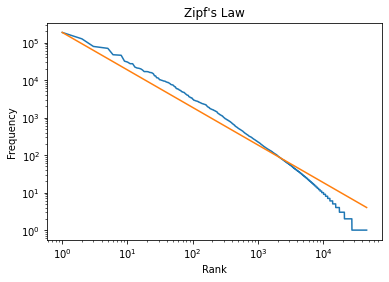

In [20]:
# Show Zipf's law using Gutenberg Corpus? (download the Gutenberg Corpus using nltk)

# download gutenberg corpus
nltk.download('gutenberg')
from nltk.corpus import gutenberg
# get the words from the corpus
words = gutenberg.words()
if is_lemmatization:
    words = do_lemmatization(words)

if is_stemming:
    words = do_stemming(words)
# show the Zipf's law
show_zipfs_law(words)

### Question 2: Perform word tokenization on string 

"Let’s go and meet Mr. Takashi, one of the prominent members of N.C.A. in Japan."

In [21]:
# Perform word tokenization on text string
text = "Let’s go and meet Mr. Takashi, one of the prominent members of N.C.A. in Japan."
cleaned_text = re.sub(r'[^\w\s]', '', text)
tokens = word_tokenize(cleaned_text)
print(tokens)


['Lets', 'go', 'and', 'meet', 'Mr', 'Takashi', 'one', 'of', 'the', 'prominent', 'members', 'of', 'NCA', 'in', 'Japan']


### Question(3) Write a custom function to perform stemming to handle "ed" at the end of a word.

In [22]:
def custom_stemming_ed(word):
    """Custom Stemming ending with ed, ing, s"""
    if word.endswith('ing'):
        return word[:-3]
    elif word.endswith('ed'):
        return word[:-2]
    elif word.endswith('s'):
        return word[:-1]
    else:
        return word

custom_stemming_ed('played')

'play'

### Question 4: Remove emails from the given text using regular expressions?

In [23]:
def remove_emails(text):
    """Remove emails from text"""
    return re.sub(r'\S*@\S*\s?', '', text)

text = """
Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@gmail.com
Charles Harris
800-555-5669a
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com
Eric Williams
560-555-5153
806 1st St., Faketown AK 86847
laurawilliams@outlook.com
"""

print(remove_emails(text))


Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
Charles Harris
800-555-5669a
969 High St., Atlantis VA 34075
Eric Williams
560-555-5153
806 1st St., Faketown AK 86847



# Tutorial 2 stuff

In [49]:
# Importing the necessary libraries
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from sklearn.feature_extraction.text import CountVectorizer
from nltk.lm.preprocessing import padded_everygram_pipeline
nltk.download('brown')
from nltk.lm import MLE
import spacy

[nltk_data] Downloading package brown to
[nltk_data]     /Users/samarthpawar/nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Bigram Calculations

In [25]:
# Dummy text data containing two sentences
text = [['a', 'b', 'c'], ['a', 'c', 'd', 'c', 'e', 'f']] # List of list format 
# Each sentence must be a list of words i.e. sentence.split() will do the job
print(list(bigrams(text[0])))
print(list(bigrams(text[1])))

[('a', 'b'), ('b', 'c')]
[('a', 'c'), ('c', 'd'), ('d', 'c'), ('c', 'e'), ('e', 'f')]


## N-grams Calculations

In [26]:
list(ngrams(text[1], n=3)) # Tri-grams of second sentence 

[('a', 'c', 'd'), ('c', 'd', 'c'), ('d', 'c', 'e'), ('c', 'e', 'f')]

## Padding

In [27]:
# But since we are not able to see starting and ending of the word, hence, we will use pad_sequence
padded_sent = list(pad_sequence(text[0], # Text to be padded
                  pad_left=True, # Padding to the left
                  left_pad_symbol="<s>", 
                  pad_right=True, # Padding to the right 
                  right_pad_symbol="</s>", 
                  n=2)) # No. of grams 
print(padded_sent)

['<s>', 'a', 'b', 'c', '</s>']


In [28]:
list(ngrams(padded_sent, n=2)) # 2-grams 
# Now we have the starting and ending of the word

[('<s>', 'a'), ('a', 'b'), ('b', 'c'), ('c', '</s>')]

In [29]:
# for N gram model we put N-1 padding at the start and end of the sentence
list(pad_both_ends(text[0], n=3)) # Using pad_both_ends directly

['<s>', '<s>', 'a', 'b', 'c', '</s>', '</s>']

In [30]:
list(ngrams(pad_both_ends(text[1], n=3), n=3)) # Using pad_both_ends directly

[('<s>', '<s>', 'a'),
 ('<s>', 'a', 'c'),
 ('a', 'c', 'd'),
 ('c', 'd', 'c'),
 ('d', 'c', 'e'),
 ('c', 'e', 'f'),
 ('e', 'f', '</s>'),
 ('f', '</s>', '</s>')]

## All grams

In [31]:
padded_bigrams = list(pad_both_ends(text[0], n=2))
all_grams = list(everygrams(padded_bigrams, max_len=2))
all_grams

[('<s>',),
 ('<s>', 'a'),
 ('a',),
 ('a', 'b'),
 ('b',),
 ('b', 'c'),
 ('c',),
 ('c', '</s>'),
 ('</s>',)]

### Printing the count of bigrams and trigrams from the all gram model

In [32]:
def print_n_count_allgrams(all_grams):
    # Calculating the number of bi-grmas and unigrmas in first sentence [a, b, c]
    count = {}
    for i in all_grams:
        if len(i) == 1:
            if count.get("unigrams"): count["unigrams"] = count.get("unigrams") + 1
            else: count["unigrams"] = 1
        else:
            if count.get("bigrams"): count["bigrams"] = count.get("bigrams") + 1
            else: count["bigrams"] = 1
    print("Total number of unigrams: ", count.get("unigrams"))
    print("Total number of bigrams: ", count.get("bigrams"))

print_n_count_allgrams(all_grams)

Total number of unigrams:  5
Total number of bigrams:  4


## Generating Vocabulary (Flatten list of our All grams list)

In [33]:
# Getting the padded sequence as a single list of words which is nothing but our vocabulary 
list(flatten(pad_both_ends(sent, n=2) for sent in text))

['<s>', 'a', 'b', 'c', '</s>', '<s>', 'a', 'c', 'd', 'c', 'e', 'f', '</s>']

In [34]:
# Better way to generate vocabulary and padded sequence
training_ngrams, padded_sentences = padded_everygram_pipeline(2, text)
for ind, ngramlize_sent in enumerate(training_ngrams):
  print(f"n-grams for sentence {ind + 1}")
  print(list(ngramlize_sent))
# training_ngrams provides us with all_grams for every sentence in our text 
# Padded_sentences provides is nothing but our vocabulary

n-grams for sentence 1
[('<s>',), ('<s>', 'a'), ('a',), ('a', 'b'), ('b',), ('b', 'c'), ('c',), ('c', '</s>'), ('</s>',)]
n-grams for sentence 2
[('<s>',), ('<s>', 'a'), ('a',), ('a', 'c'), ('c',), ('c', 'd'), ('d',), ('d', 'c'), ('c',), ('c', 'e'), ('e',), ('e', 'f'), ('f',), ('f', '</s>'), ('</s>',)]


In [35]:
print(list(padded_sentences))

['<s>', 'a', 'b', 'c', '</s>', '<s>', 'a', 'c', 'd', 'c', 'e', 'f', '</s>']


## Example of making a model for real dataset

In [36]:
# Brown dataset
all_para_ids = nltk.corpus.brown.fileids()
print("Total Number of Paragraphs :", len(all_para_ids))
print(all_para_ids[:10])
print(f"No. of sentences in first paragraph {len(nltk.corpus.brown.sents(all_para_ids[0]))}.")
print(f"First sentence from first paragraph: {' '.join(nltk.corpus.brown.sents(all_para_ids[0])[0])}")

Total Number of Paragraphs : 500
['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10']
No. of sentences in first paragraph 98.
First sentence from first paragraph: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .


In [37]:
# Create list of all sentences present in "brown" coupus
full_brown = []

for text in all_para_ids:
    para = nltk.corpus.brown.sents(text)
    full_brown += [list(i) for i in para]

print(f"Total number of sentences in Brown corpus: {len(full_brown)}")

Total number of sentences in Brown corpus: 57340


## Training our N-gram Model

In [38]:
n = 3
model = MLE(n) # Lets train a 3-grams model, previously we set n=3

# Preprocess the tokenized text for 3-grams language modelling
train_data, padded_sents = padded_everygram_pipeline(n, full_brown)

In [39]:
# Train the model
model.fit(train_data, padded_sents)
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 56060 items>


In [40]:
# n-gram model with laplace smoothing
model = Laplace(n)
# Preprocess the tokenized text for 3-grams language modelling
train_data, padded_sents = padded_everygram_pipeline(n, full_brown)
model.fit(train_data, padded_sents)
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 56060 items>


In [41]:
# Using model to retrieve counts
print(model.counts['language']) # count(language)

# count(Fulton, County)
print(model.counts[['Fulton']]['County'])

# count(Fulton, County, Grand)
print(model.counts[['Fulton', 'County']]['Grand'])

# P(language)
print(model.score('language'))

# P(County | Fulton)
print(model.score('County', ['Fulton']))

# P(Grand | Fulton, County)
print(model.score('Grand', ['Fulton', 'County']))

106
6
1
7.396592866642887e-05
0.00012482836100362001
3.567224342738915e-05


In [53]:
# Now we have ngram model, let's use it to generate text
# Generate 10 words after 'The'
print(model.generate(10, text_seed=['Grand']))

['Canyon', 'voice', 'outstanding', 'above', 'the', 'year-earlier', 'level', '.', '</s>', '</s>']


## POS tagging using spacy

In [51]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is the second tutorial of NLP. I hope you are enjoying it.")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))

This  |  PRON  |  pronoun  |  DT  |  determiner
is  |  AUX  |  auxiliary  |  VBZ  |  verb, 3rd person singular present
the  |  DET  |  determiner  |  DT  |  determiner
second  |  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
tutorial  |  NOUN  |  noun  |  NN  |  noun, singular or mass
of  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
NLP  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
.  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer
I  |  PRON  |  pronoun  |  PRP  |  pronoun, personal
hope  |  VERB  |  verb  |  VBP  |  verb, non-3rd person singular present
you  |  PRON  |  pronoun  |  PRP  |  pronoun, personal
are  |  AUX  |  auxiliary  |  VBP  |  verb, non-3rd person singular present
enjoying  |  VERB  |  verb  |  VBG  |  verb, gerund or present participle
it  |  PRON  |  pronoun  |  PRP  |  pronoun, personal
.  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer


# Practice problems for Tierce-1

## Autocomplete Problem using N gram model

In [146]:
N = 3
model = MLE(N)
train_data, padded_sents = padded_everygram_pipeline(N, full_brown)
model.fit(train_data, padded_sents)

In [147]:
# Autocomplete using ngram model
# We will use the model trained on Brown corpus

def auto_complete(previous_tokens, model, N):

    # most recent 'n-1' words
    prev_ngram = previous_tokens[max(-N+1, -len(previous_tokens)):]

    max_prob_so_far = 0
    best_word = None

    for word in model.vocab:
        if model.score(word, prev_ngram) > max_prob_so_far:
            max_prob_so_far = model.score(word, prev_ngram)
            best_word = word

    return best_word

# Let's try it out
auto_complete(['first', 'time'], model, N)


'in'

In [148]:
k = 10
my_tokens = ['recent', 'primary']
for i in range(k):
    next_word = auto_complete(my_tokens, model, N)
    if next_word is not None:
        print(next_word)
        my_tokens.append(next_word)
        my_tokens.pop(0)

election
produced
``
no
evidence
of
the
United
States
,


## Edit Distance Snippets

In [157]:

def edit_distance_custom(word1, word2, backtrace=False, return_matrix=False):
    m = len(word1)
    n = len(word2)
    dp = [[0 for i in range(n+1)] for j in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1])

    if backtrace:
        # backtracking
        i = m
        j = n
        operations = []
        while i > 0 and j > 0:
            if word1[i-1] == word2[j-1]:
                i -= 1
                j -= 1
            elif dp[i][j] == dp[i-1][j-1] + 1:
                operations.append(f"Substitute {word1[i-1]} with {word2[j-1]}")
                i -= 1
                j -= 1
            elif dp[i][j] == dp[i-1][j] + 1:
                operations.append(f"Delete {word1[i-1]}")
                i -= 1
            elif dp[i][j] == dp[i][j-1] + 1:
                operations.append(f"Insert {word2[j-1]}")
                j -= 1
        while i > 0:
            operations.append(f"Delete {word1[i-1]}")
            i -= 1
        while j > 0:
            operations.append(f"Insert {word2[j-1]}")
            j -= 1

        if return_matrix:
            return dp[m][n], operations, dp
        else:
            return dp[m][n], operations

    if return_matrix:
        return dp[m][n], dp
    else:
        return dp[m][n]

def edit_distance_with_transposition(word1, word2, backtrace=False, return_matrix=False):
    m = len(word1)
    n = len(word2)
    dp = [[0 for i in range(n+1)] for j in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1])
                if i > 1 and j > 1 and word1[i-1] == word2[j-2] and word1[i-2] == word2[j-1]:
                    dp[i][j] = min(dp[i][j], dp[i-2][j-2] + 1)

    if backtrace:
        # backtracking
        i = m
        j = n
        operations = []
        while i > 0 and j > 0:
            if word1[i-1] == word2[j-1]:
                i -= 1
                j -= 1
            elif dp[i][j] == dp[i-1][j-1] + 1:
                operations.append(f"Substitute {word1[i-1]} with {word2[j-1]}")
                i -= 1
                j -= 1
            elif dp[i][j] == dp[i-1][j] + 1:
                operations.append(f"Delete {word1[i-1]}")
                i -= 1
            elif dp[i][j] == dp[i][j-1] + 1:
                operations.append(f"Insert {word2[j-1]}")
                j -= 1
            elif dp[i][j] == dp[i-2][j-2] + 1:
                operations.append(f"Transpose {word1[i-2]} and {word1[i-1]}")
                i -= 2
                j -= 2
        while i > 0:
            operations.append(f"Delete {word1[i-1]}")
            i -= 1
        while j > 0:
            operations.append(f"Insert {word2[j-1]}")
            j -= 1

        if return_matrix:
            return dp[m][n], operations, dp
        else:
            return dp[m][n], operations
    
    if return_matrix:
        return dp[m][n], dp
    else:
        return dp[m][n]

In [150]:
# edit distance between two words
from nltk.metrics import edit_distance

edit_distance("rain", "shine", transpositions=True)

3

In [155]:
edit_distance_custom("rain", "shine", backtrace=True, return_matrix=True)

(3,
 ['Insert e', 'Substitute a with h', 'Substitute r with s'],
 [[0, 1, 2, 3, 4, 5],
  [1, 1, 2, 3, 4, 5],
  [2, 2, 2, 3, 4, 5],
  [3, 3, 3, 2, 3, 4],
  [4, 4, 4, 3, 2, 3]])

In [160]:
edit_distance_with_transposition("maezel", "meazur", backtrace=True, return_matrix=True)

(3,
 ['Substitute l with r', 'Substitute e with u', 'Transpose a and e'],
 [[0, 1, 2, 3, 4, 5, 6],
  [1, 0, 1, 2, 3, 4, 5],
  [2, 1, 1, 1, 2, 3, 4],
  [3, 2, 1, 1, 2, 3, 4],
  [4, 3, 2, 2, 1, 2, 3],
  [5, 4, 3, 3, 2, 2, 3],
  [6, 5, 4, 4, 3, 3, 3]])

## Viterbi Distance Snippets

In [214]:
# viterbi decoding for POS tagging
def viterbi_decoding(tokens, model, all_possible_tags):
    # tokens: list of tokens
    # model: ngram model
    # returns: list of tags

    # initialize
    T = len(tokens)
    # get all possible tags
    tags = all_possible_tags

    V = len(tags)
    dp = [[0 for i in range(V)] for j in range(T)]
    backpointers = [[0 for i in range(V)] for j in range(T)]

    # base case
    for i in range(V):
        # dp[0][i] = model.score(tokens[0], tags[i])
        if tokens[0] in model.keys() and tags[i] in model[tokens[0]].keys() and tags[i] in model.keys() and '<s>' in model[tags[i]].keys():
            dp[0][i] = max(dp[0][i], model[tokens[0]][tags[i]] * model[tags[i]]['<s>'])

        backpointers[0][i] = 0

    # induction
    for t in range(1, T):
        # print('\n' + '*'*50)
        # print(f"t = {t}")
        for i in range(V):
            # print(f"Current tag = {tags[i]}")
            max_prob_so_far = -1
            best_tag = None
            for j in range(V):
                # print(f"Previous tag = {tags[j]}")
                if tokens[t] in model.keys() and tags[i] in model[tokens[t]].keys() and tags[i] in model.keys() and tags[j] in model[tags[i]].keys():
                    prob = dp[t-1][j] * model[tokens[t]][tags[i]] * model[tags[i]][tags[j]]
                else:
                    prob = -1

                # print(f"prob = {prob}")

                if prob > max_prob_so_far:
                    max_prob_so_far = prob
                    best_tag = j

            dp[t][i] = max_prob_so_far
            backpointers[t][i] = best_tag

            # print(f"dp[{t}][{i}] = {dp[t][i]}")
            # print(f"backpointers[{t}][{i}] = {backpointers[t][i]}")
            # print()


    # termination
    max_prob_so_far = -1
    best_tag = None
    for i in range(V):
        if dp[T-1][i] > max_prob_so_far:
            max_prob_so_far = dp[T-1][i]
            best_tag = i

    # backtracking
    best_sequence = [best_tag for i in range(T)]
    for t in range(T-1, 0, -1):
        best_sequence[t-1] = backpointers[t][best_sequence[t]]

    return [tags[i] for i in best_sequence]


In [215]:
model = {
    'Det': {'<s>': 0.25}, 
    'Noun': {'<s>': 0.25, 'Det': 0.5, 'Noun': 0.2, 'Adj': 0.2, 'Verb': 0.3}, 
    'Adj': {'<s>': 0.25, 'Det': 0.3, 'Noun': 0.002}, 
    'Verb': {'<s>': 0.25, 'Det': 0.00001, 'Noun': 0.3, 'Adj': 0.001, 'Verb': 0.1},
    'the': {'Det': 0.3, 'Noun': 0.1},
    'light': {'Noun': 0.003, 'Adj': 0.002, 'Verb': 0.06},
    'book': {'Noun': 0.003, 'Verb': 0.01},
}

tokens = ['the', 'light', 'book']
tags = ['Det', 'Noun', 'Adj', 'Verb']

viterbi_decoding(tokens, model, tags)

['Noun', 'Verb', 'Verb']